## Zindi
AirQo Ugandan Air Quality Forecast Challenge  
https://zindi.africa/competitions/airqo-ugandan-air-quality-forecast-challenge

In [1]:
# отключение ворнингов
import warnings
warnings.filterwarnings('ignore')

# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
# настройка размеров графиков
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
sns.set(style='whitegrid', rc={'figure.figsize':(12, 8), 'lines.linewidth': 3})

# настройка стиля графиков
plt.style.use('ggplot')
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# чтение данных
data = pd.read_csv('data/zindi_train.csv')
data.head(5)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


## Подготовка данных

In [4]:
def split_columns(df, columns_to_split, sep):
    """
    Splits column with multiple values into multiple columns
    :param df: pandas DataFrame
    :param columns_to_split: list of columns with values to split
    :param sep: separator
    """
    for column in columns_to_split:
        column_l = df[column].apply(lambda x: x.split(',')).to_list()
        tmp = pd.DataFrame(column_l, columns=[f'{column}_{i}' for i in range(1, len(column_l[0])+1)])
        df.drop(column, axis=1, inplace=True)
        df = pd.merge(df, tmp, left_index=True, right_index=True)
    return df

In [5]:
data = split_columns(data, columns_to_split=['temp', 'precip', 'rel_humidity',
                                             'wind_dir', 'wind_spd', 'atmos_press'], sep=',')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Columns: 729 entries, ID to atmos_press_121
dtypes: float64(1), object(728)
memory usage: 86.4+ MB


In [7]:
data.replace('nan', np.nan, inplace=True)

data.head(3)

,ID,location,target,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,...,atmos_press_112,atmos_press_113,atmos_press_114,atmos_press_115,atmos_press_116,atmos_press_117,atmos_press_118,atmos_press_119,atmos_press_120,atmos_press_121
0,ID_train_0,C,45.126304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.79083333,87.81416667,87.85833333,87.87166667,87.8025,87.76166667,87.74333333,87.71583333,87.75083333,87.76833333
1,ID_train_1,D,79.131702,22.53333333,21.71666667,20.83333333,20.98333333,20.875,20.14166667,19.375,...,90.7075,90.6825,90.60416667,90.48166667,90.35416667,90.2725,90.26666667,90.32583333,90.43916667,90.52916667
2,ID_train_10,A,32.661304,28.975,27.95,29.6,26.425,22.09166667,21.775,22.33333333,...,88.2875,88.30166667,88.35333333,88.40916667,88.44833333,88.5,88.495,88.51583333,88.47583333,88.41583333


In [8]:
def add_stat(df, columns, name, function):
    """
    Add descriptive stat
    :param df: pandas DataFrame
    :param columns: list of columns
    :param function: statistic function
    """
    f_name = str(function)
    f_name = name + '_' + f_name[f_name.index(' ')+1: f_name.index(' at')]
    df[f_name] = df[columns].apply(
        lambda x: function([float(i) for i in x if i is not np.nan]),axis=1)

In [9]:
# добавим статистики по температуре

temps = [column for column in data.columns if 'temp' in column]
descriptive_functions = [np.mean, np.median, np.max, np.min, np.std, np.ptp, np.var]

for function in descriptive_functions:
    add_stat(data, temps, 'temp', function)

In [10]:
# добавим статистики по осадкам

precips = [column for column in data.columns if 'precip' in column]

for function in descriptive_functions:
    add_stat(data, precips, 'precip', function)

In [11]:
# добавим статистики по влажности

humidities = [column for column in data.columns if 'rel_humidity' in column]

for function in descriptive_functions:
    add_stat(data, humidities, 'humidity', function)

In [12]:
# добавим статистики по направлению ветра

wind_dirs = [column for column in data.columns if 'wind_dir' in column]

for function in descriptive_functions:
    add_stat(data, wind_dirs, 'wind_dir', function)

In [13]:
# добавим статистики по скорости ветра

wind_spds = [column for column in data.columns if 'wind_spd' in column]

for function in descriptive_functions:
    add_stat(data, wind_spds, 'wind_spd', function)

In [14]:
# добавим статистики по атмосферному давлению

atmos_press = [column for column in data.columns if 'atmos_press' in column]

for function in descriptive_functions:
    add_stat(data, atmos_press, 'atmos_press', function)

In [15]:
# сохраню исходный датасет со статистиками для дальнейшей работы
data_full = data.copy()

# удалю все столбцы с единичными наблюдениями
cols_to_drop = []

for col_gr in [temps, precips, humidities, wind_dirs, wind_spds, atmos_press]:
    cols_to_drop.extend(col_gr)
    
data.drop(cols_to_drop, axis=1, inplace=True)

# удалим признак ID
data.drop('ID', axis=1, inplace=True)
data_full.drop('ID', axis=1, inplace=True)

# OHE для location
data = pd.get_dummies(data, columns=['location'])
data_full = pd.get_dummies(data_full, columns=['location'])


data = data.astype('float64')
data_full = data_full.astype('float64')

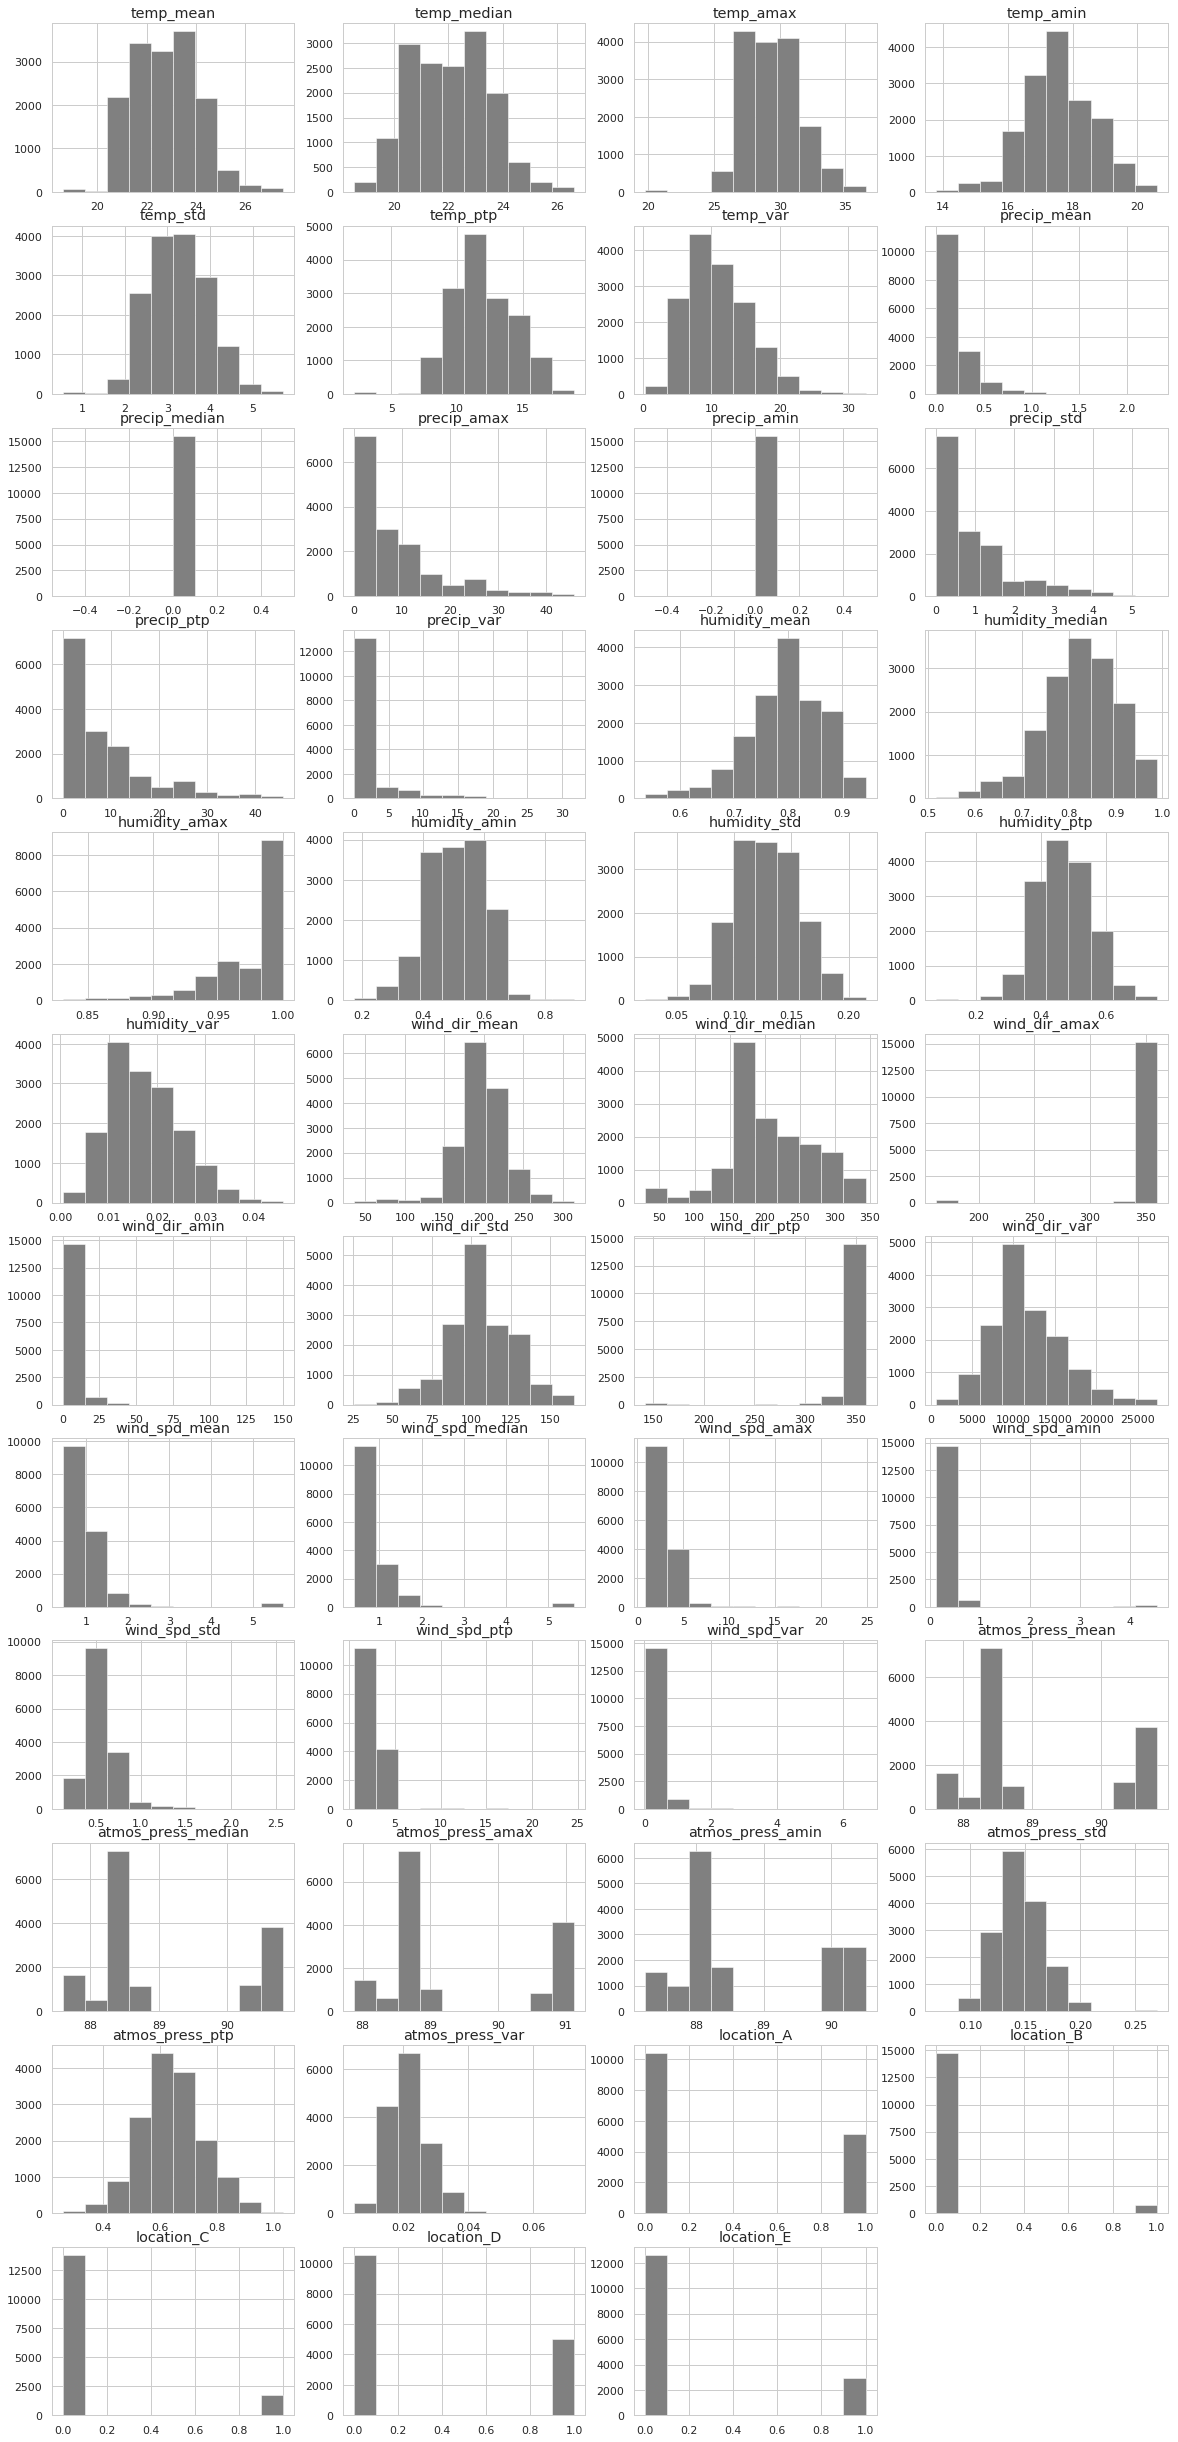

In [16]:
# распределение признаков

plt.figure(figsize=(20, 44))

plot_num = 0
for feature in data.columns:
    if feature != 'target':
        plot_num += 1
        plt.subplot(12, 4, plot_num)
        plt.hist(data[feature], color='grey')
        plt.title(feature)

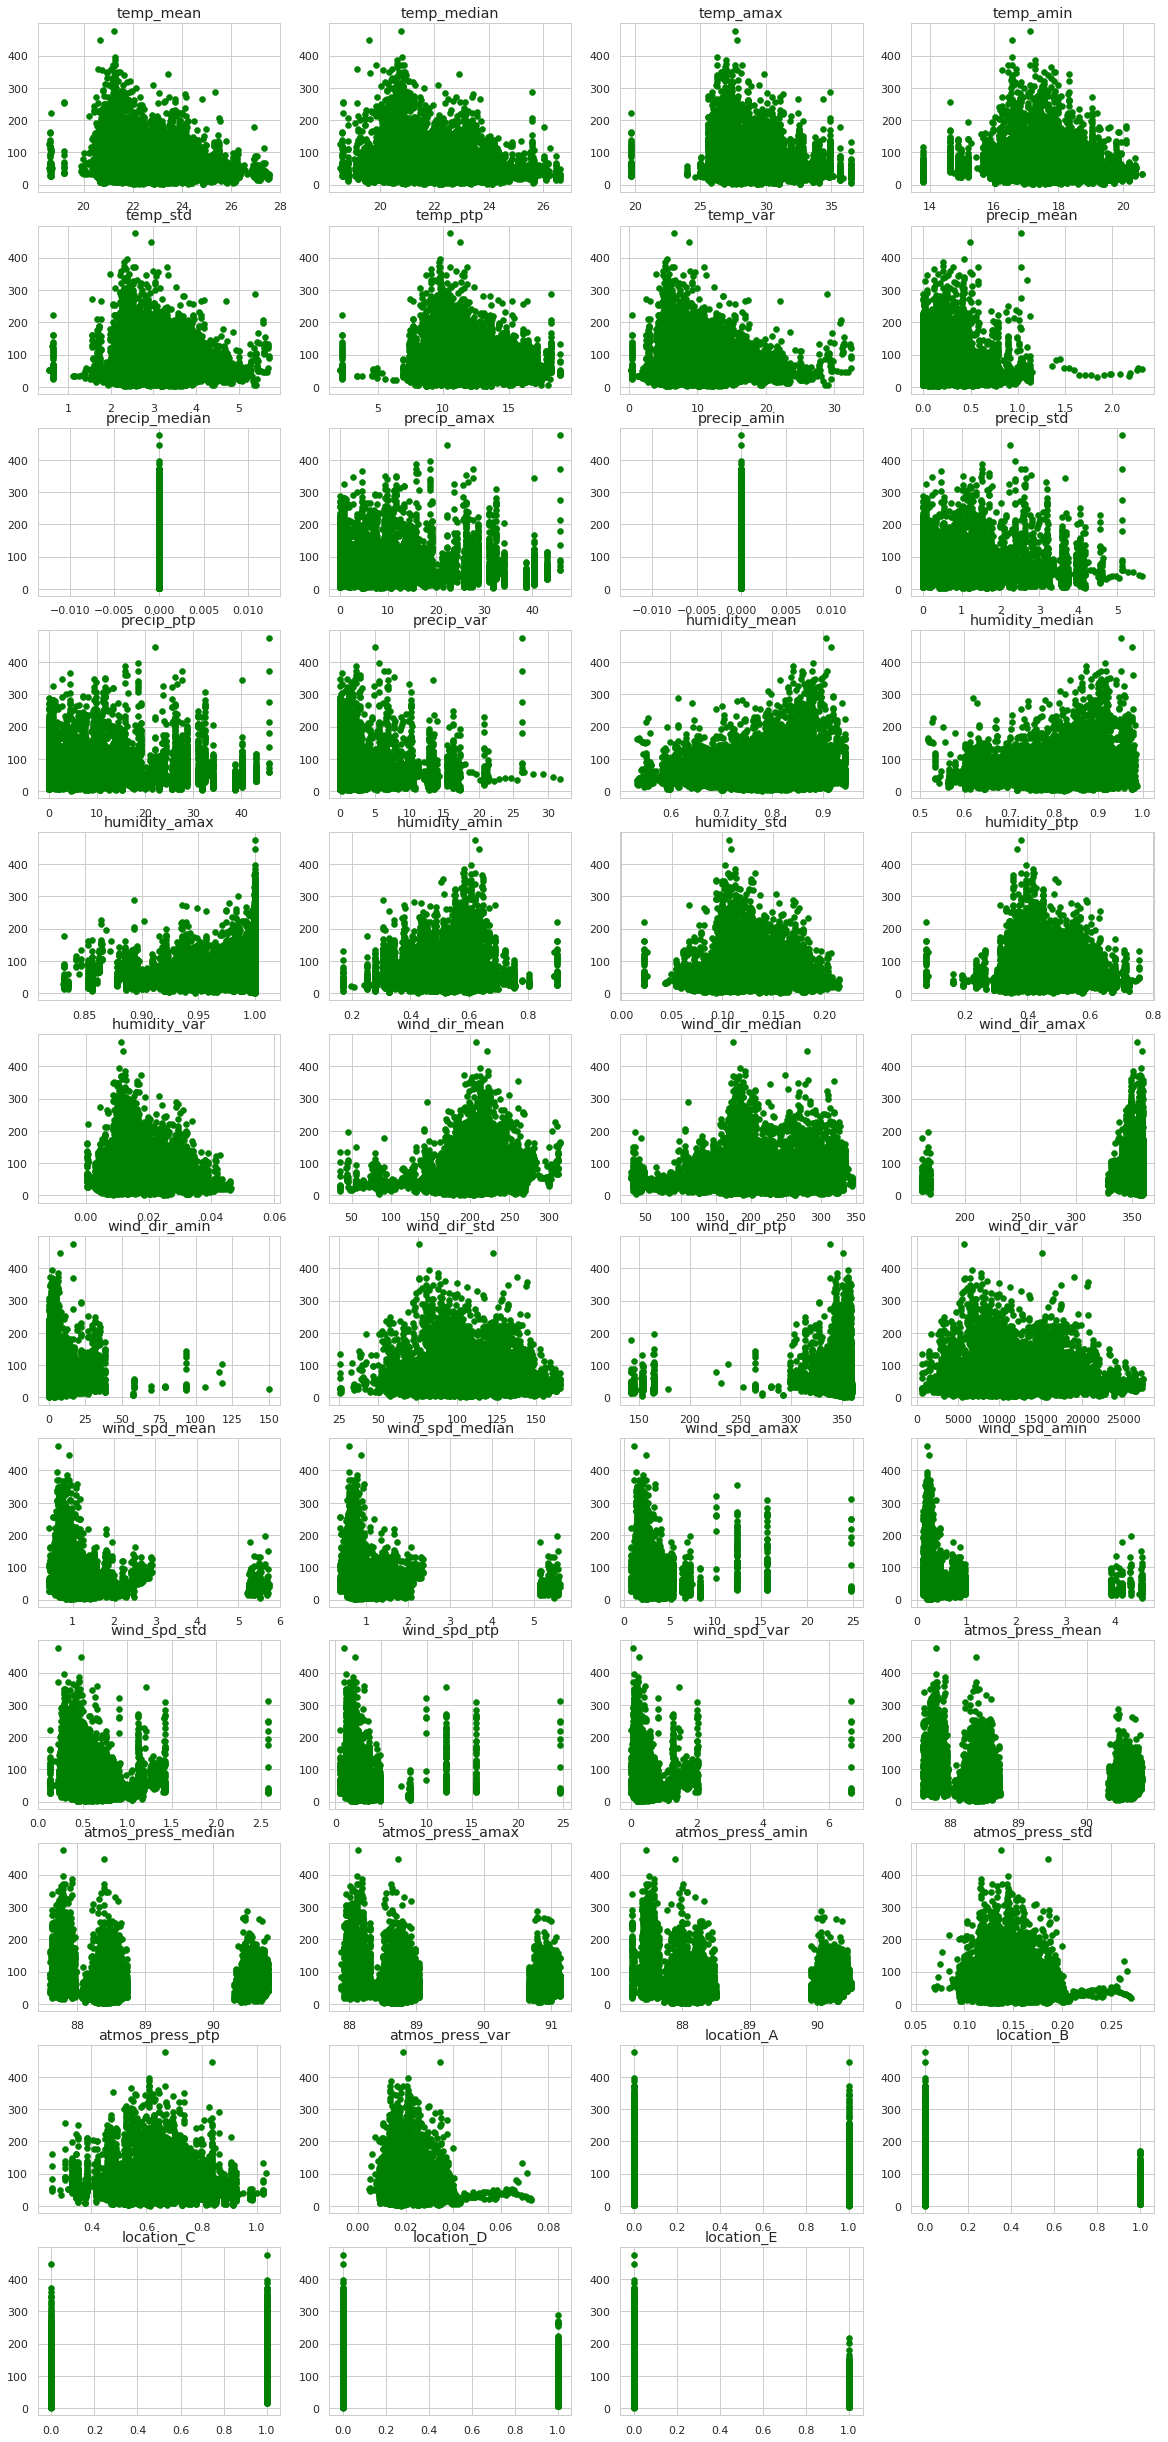

In [17]:
# влияние признаков на таргет

plt.figure(figsize=(20, 44))

plot_num = 0
for feature in data.columns:
    if feature != 'target':
        plot_num += 1
        plt.subplot(12, 4, plot_num)
        plt.scatter(data[feature], data['target'], c='green')
        plt.title(feature)

In [18]:
# удалю константные признаки

data.drop(['precip_amin', 'precip_median'], axis=1, inplace=True)
data_full.drop(['precip_amin', 'precip_median'], axis=1, inplace=True)

## Построение моделей

In [19]:
# импорт библиотек
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, cross_val_score, cross_val_predict,
                                     StratifiedKFold, RandomizedSearchCV, GridSearchCV)
from sklearn.metrics import make_scorer, mean_squared_error

In [20]:
# отделю таргет и признаки
X = data.drop('target', axis=1)
y = data['target']

# воспроизводимость
rs = np.random.seed(111)
    
# разобью данные на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=rs)
       
print('Среднее значение таргета в трейне: {:.4f}'.format(np.mean(y_train)), end='\n\n')
print('Среднее значение таргета в тесте: {:.4f}'.format(np.mean(y_test)))

Среднее значение таргета в трейне: 58.2893

Среднее значение таргета в тесте: 58.1019


In [21]:
# отделю таргет и признаки
X = data_full.drop('target', axis=1)
y = data_full['target']

X_train_full = X.iloc[X_train.index]
X_test_full = X.iloc[X_test.index]
y_train_full = y.iloc[y_train.index]
y_test_full = y.iloc[y_test.index]

print('Среднее значение таргета в трейне: {:.4f}'.format(np.mean(y_train_full)), end='\n\n')
print('Среднее значение таргета в тесте: {:.4f}'.format(np.mean(y_test_full)))

Среднее значение таргета в трейне: 58.2893

Среднее значение таргета в тесте: 58.1019


In [22]:
# стандартизация данных
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
def cross_validation(classifier, X_train, y_train, cv=3, scoring='accuracy'):
    
    # название модели для красивого вывода
    clf_name = str(classifier)
    try:
        clf_name = clf_name[:clf_name.index('(')]
    except ValueError:
        pass
    cv_scores = cross_val_score(classifier, X_train, y_train, scoring=scoring, cv=cv)
    print('Среднее значение \033[1m{}\033[0m для {} на валидации: \033[1m{:.4f}\033[0m'.format(
        scoring, clf_name, np.mean(cv_scores)))
    
def fit_evaluate(classifier, X_train, X_test, y_train, y_test, metric=mean_squared_error):
    # название модели для красивого вывода
    clf_name = str(classifier)
    try:
        clf_name = clf_name[:clf_name.index('(')]
    except ValueError:
        pass
    
    # название метрики 
    metric_name = str(metric)
    try:
        metric_name = metric_name[metric_name.index(' ')+1:metric_name.index(' at')]
    except ValueError:
        pass
    
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    result = metric(y_test, predictions)
    print('Значение \033[1m{}\033[0m для {} на отложенной выборке: \033[1m{:.4f}\033[0m'.format(
        metric_name, clf_name, result))
    return result

In [24]:
def rmse(y_true, y_preds):
    """
    Root Mean Squared Error
    :param y_true: y true values
    :param y_preds: model predictions
    """
    return mean_squared_error(y_true, y_preds, squared=False)

rmse_scorer = make_scorer(rmse)

Значение rmse для LGBMRegressor на отложенной выборке: 26.1432


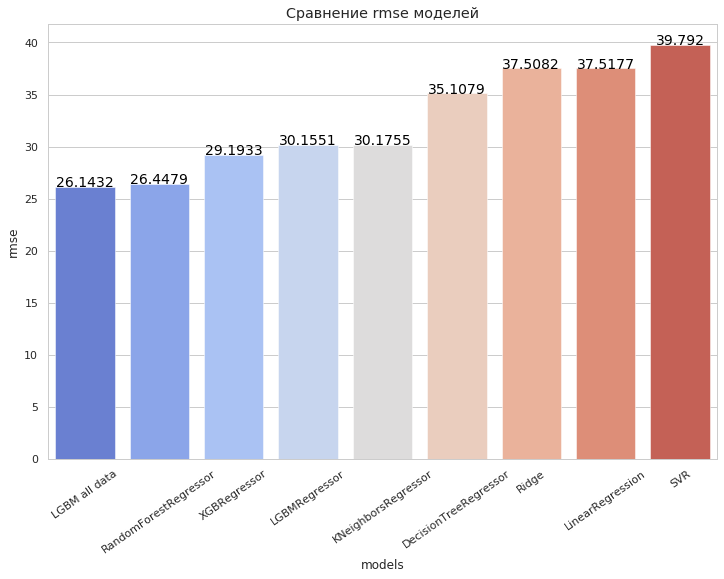

In [25]:
def compare_models(models, X_train, X_test,
                  y_train, y_test, metric):
    
    # название метрики 
    metric_name = str(metric)
    try:
        metric_name = metric_name[metric_name.index(' ')+1:metric_name.index(' at')]
    except ValueError:
        pass
    
    model_names = []
    metric_values = []
    for model in models:
        # название модели для красивого вывода
        model_name = str(model)
        try:
            model_names.append(model_name[:model_name.index('(')])
        except ValueError:
            model_names.append('CatBoostClassifier')
    
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        metric_values.append(metric(y_test, predictions))
        
    result = pd.DataFrame({'models': model_names, metric_name:metric_values})
    return result.sort_values(by=metric_name, ascending=True)


def plot_result(results, metric_name='Accuracy'):
    ax=sns.barplot(x=results['models'], y=results[metric_name], palette='coolwarm')
    for idx, (i, row) in enumerate(results.iterrows()):
        ax.text(idx, row[metric_name], round(row[metric_name],4), color='black', size=14, ha='center')
    plt.title('Сравнение {} моделей'.format(metric_name))
    plt.xticks(rotation=35)
    plt.show();


models = [Ridge(random_state=rs),
          LinearRegression(),
          SVR(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state=rs),
          DecisionTreeRegressor(random_state=rs),
          LGBMRegressor(random_state=rs),
          XGBRegressor(random_state=rs)
         ] 

# проверим на базовых фичах
base_features = compare_models(models, X_train, X_test, y_train, y_test, metric=rmse)
lgbm_full_score = fit_evaluate(LGBMRegressor(random_state=rs), X_train_full, X_test_full,
             y_train_full, y_test_full, metric=rmse)

base_features.loc[len(models)] = ['LGBM all data', lgbm_full_score]
base_features = base_features.sort_values(by='rmse', ascending=True)


plot_result(base_features, metric_name='rmse')

Tree-based ансамбли ощутимо лучше линейных моделей.  
Попробую подобрать гиперпараметры для лучших моделей

## Подбор гиперпараметров для KNN

Буду подбирать:
- кол-во соседей, n_neighbors
- веса, weights

In [26]:
%%time

knn_params = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance']
}


knn_grid = GridSearchCV(
    estimator=KNeighborsRegressor(n_jobs=-1),
    scoring='neg_mean_squared_error', # буду подбирать с помощью MSE
    param_grid=knn_params,
    cv=5, # кросс-валидация с 5 фолдами
    n_jobs=-1, # все доступные потоки
    verbose=False # без вывода информации
)

knn_grid.fit(X_train, y_train)
final_knn = knn_grid.best_estimator_

fit_evaluate(final_knn, X_train, X_test,
             y_train, y_test, metric=rmse)

Значение rmse для KNeighborsRegressor на отложенной выборке: 27.5566
CPU times: user 6.19 s, sys: 1.56 s, total: 7.76 s
Wall time: 30.2 s


27.55663112874148

## Подбор гиперпараметров для случайного леса

Подбирать буду стандартный набор признаков, характерный для моделей, основанных на деревьях решений:

- количество деревьев - n_estimators
- максимальная глубина дерева - max_depth
- минимальное число элементов в листе - min_samples_leaf
- максимальное количество листьев в дереве max_leaf_nodes
- минимальное число объектов для разбиения min_samples_split


In [27]:
%%time

# пройду по широкой сетке параметров
rf_params = {
    'n_estimators': list(np.arange(1, 500, 10)),
    'max_depth': [1, 5, 20, None],
    'min_samples_leaf': list(np.arange(1, 20)),
    'max_leaf_nodes': [10, 50, 100, 500, 750, 1000, None],
    'min_samples_split': list(np.arange(2, 50)),
}


rf_grid = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=rs),
    scoring='neg_mean_squared_error',
    param_distributions=rf_params,
    cv=5,
    n_jobs=-1,
    random_state=rs,
    n_iter=100
)

rf_grid.fit(X_train, y_train)
final_rf = rf_grid.best_estimator_

CPU times: user 1min 31s, sys: 119 ms, total: 1min 31s
Wall time: 12min 56s


In [28]:
fit_evaluate(final_rf, X_train, X_test,
             y_train, y_test, metric=rmse)

Значение rmse для RandomForestRegressor на отложенной выборке: 28.4076


28.407560597497223

In [29]:
%%time

# подберу поточнее
rf_params = {
    'n_estimators': list(np.arange(1000, 2000, 10)),
    'min_samples_leaf': np.arange(1, 5),
    'min_samples_split': np.arange(1, 10),
}


rf_grid = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=rs),
    scoring='neg_mean_squared_error',
    param_distributions=rf_params,
    cv=5,
    n_jobs=-1,
    random_state=rs,
    n_iter=100
)

rf_grid.fit(X_train, y_train)
final_rf = rf_grid.best_estimator_

CPU times: user 11min 7s, sys: 3.84 s, total: 11min 11s
Wall time: 2h 27min 30s


In [30]:
fit_evaluate(final_rf, X_train, X_test,
             y_train, y_test, metric=rmse)

Значение rmse для RandomForestRegressor на отложенной выборке: 26.1539


26.153941233057818

## Подбор гиперпараметров для градиентного бустинга

Подбирать буду тот же набор признаков, что и для RF, добавлю только learning_rate:

- количество деревьев - n_estimators
- максимальная глубина дерева - max_depth
- минимальное число элементов в листе - min_data_in_leaf
- максимальное количество листьев в дереве num_leaves
- минимальное число объектов для разбиения min_child_samples
- вес класса - class_weight
- learning_rate


Подбирать буду с помощью RandomizedSearchCV

In [31]:
%%time

# пройду по широкой сетке параметров
lgbm_params = {
    'n_estimators': np.linspace(10, 2000, 1000, dtype=int),
    'max_depth': np.arange(1,20),
    'min_data_in_leaf': np.arange(1, 100),
    'num_leaves': [10, 50, 100, 150, 200, 300, 500, 750, 1000],
    'min_child_samples': np.arange(5, 50),
    'learning_rate':np.arange(0.01, 1),
    'bagging_fraction': np.arange(0.5, 1, 0.1),
    'bagging_freq': np.arange(1, 5),
    'feature_fraction': np.arange(0.5, 1, 0.1)
}


lgbm_grid = RandomizedSearchCV(
    estimator=LGBMRegressor(n_jobs=-1, metric='rmse', random_state=rs),
    scoring='neg_mean_squared_error',
    param_distributions=lgbm_params,
    cv=5,
    n_jobs=-1,
    random_state=rs,
    n_iter=500
)

# буду подбирать только на стат фичах
lgbm_grid.fit(X_train, y_train)
final_lgbm = lgbm_grid.best_estimator_

# оценивать буду на всех фичах
fit_evaluate(final_lgbm, X_train_full, X_test_full,
             y_train_full, y_test_full, metric=rmse)

Значение rmse для LGBMRegressor на отложенной выборке: 25.1380
CPU times: user 2h 36min 21s, sys: 43.3 s, total: 2h 37min 4s
Wall time: 27min 29s


25.13796799955027

## Заполнение пропусков

In [32]:
def fill_na(df):
    """
    Replace NaN values with mean of column
    :param df: pandas DataFrame
    """
    new_df = df.copy()
    
    for column in new_df.columns.tolist():
        new_df[column].fillna(np.mean(new_df[new_df[column].isnull()==False][column]), inplace=True)
    
    return new_df

In [33]:
# заполню пропуски средним значением по столбцу

new_X_train = fill_na(X_train_full)
new_X_test = fill_na(X_test_full)

In [34]:
# оценю линейную модель

fit_evaluate(LinearRegression(), new_X_train, new_X_test,
             y_train_full, y_test_full, metric=rmse)

Значение rmse для LinearRegression на отложенной выборке: 35.4814


35.48137935256493

In [35]:
# оценю KNN

fit_evaluate(final_knn, new_X_train, new_X_test,
             y_train_full, y_test_full, metric=rmse)

Значение rmse для KNeighborsRegressor на отложенной выборке: 39.1408


39.14081104526251

In [36]:
# оценю лес

fit_evaluate(final_rf, new_X_train, new_X_test,
             y_train_full, y_test_full, metric=rmse)

Значение rmse для RandomForestRegressor на отложенной выборке: 26.5036


26.50360531165453

In [37]:
1

1

In [38]:
# оценю бустинг

fit_evaluate(final_lgbm, new_X_train, new_X_test,
             y_train_full, y_test_full, metric=rmse)

Значение rmse для LGBMRegressor на отложенной выборке: 24.9716


24.97156261386482

Бустинг сильно лучше

## Отбор признаков

In [39]:
def feature_selector(estimator, X, y, cv=3, scoring='accuracy'):
    """
    Simple feature selector
    :param estimator: sklearn like eatimator
    :param X: features, pandas DataFrame
    :param y: labels, pandas Series
    """
    # название модели для красивого вывода
    estimator_name = str(estimator)
    try:
        estimator_name = estimator_name[:estimator_name.index('(')]
    except ValueError:
        pass
    
    # формируем список признаков
    features = list(X.columns)
    
    # сохраняем результат на всех фичах
    best_score = np.mean(cross_val_score(estimator, X, y, cv=cv, scoring=scoring))
    best_features = features.copy()
    
    for column in tqdm(features):
        if column in best_features:
            best_features.remove(column)
            score = np.mean(cross_val_score(estimator, X[best_features], y, cv=cv, scoring=scoring))
            # если результат ухудшился, возвращаем признак в список
            if score > best_score:
                best_features.append(column)
            else:
                best_score = score
    print(f'Best score of {estimator_name} is {best_score:.4f}')
    
    # обучаем классификатор на полученных фичах
    estimator.fit(X[best_features], y)
    
    return estimator, best_features

In [40]:
# приведем признаки обратно к пандас для удобства работы с признаками
col_names = [f'col_{i}' for i in range(1, X_train.shape[1]+1)]

X_train = pd.DataFrame(X_train, columns=col_names, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=col_names, index=y_test.index)

# подберу признаки для KNN
best_knn, knn_best_features = feature_selector(final_knn, X_train, y_train, cv=5, scoring=rmse_scorer)

100%|██████████| 45/45 [00:35<00:00,  1.28it/s]

Best score of KNeighborsRegressor is 29.9207


In [41]:
# проверю на отложенной выборке

preds = best_knn.predict(X_test[knn_best_features])
print(f'RMSE LGBM после отбора признаков {rmse(y_test, preds):.4f}')

RMSE LGBM после отбора признаков 27.3300


##  Еще потюню бустинг

In [51]:
import lightgbm as lgbm 

other_params={"num_boost_round":50000000,
              "early_stopping_rounds":50,
              "verbose_eval":1000,
}
lgbm_params = {
    "bagging_fraction": 0.7,
    "bagging_freq": 2,
    "boosting_type": "gbdt",
    "feature_fraction": 0.7,
    "learning_rate": 0.0075,
    "max_depth": -1,
    "num_threads": -1,
    "objective": "regression",
    "metric": "rmse",
    "seed": 2020,
}

In [52]:
dtrain = lgbm.Dataset(data=new_X_train, label=y_train)
dval = lgbm.Dataset(data=new_X_test, label=y_test)

model = lgbm.train(
        params=lgbm_params,
        train_set=dtrain,
        num_boost_round=50000000,
        valid_sets=(dtrain, dval),
        early_stopping_rounds=100,
        verbose_eval=1000,
    )   

Training until validation scores don't improve for 100 rounds
[1000]	training's rmse: 17.9043	valid_1's rmse: 26.4333
[2000]	training's rmse: 12.9651	valid_1's rmse: 25.4626
[3000]	training's rmse: 9.89578	valid_1's rmse: 25.0156
[4000]	training's rmse: 7.77011	valid_1's rmse: 24.7784
[5000]	training's rmse: 6.20504	valid_1's rmse: 24.628
[6000]	training's rmse: 5.02041	valid_1's rmse: 24.5226
[7000]	training's rmse: 4.09722	valid_1's rmse: 24.4445
[8000]	training's rmse: 3.36768	valid_1's rmse: 24.3843
[9000]	training's rmse: 2.7838	valid_1's rmse: 24.3384
[10000]	training's rmse: 2.3118	valid_1's rmse: 24.3023
[11000]	training's rmse: 1.92744	valid_1's rmse: 24.2717
[12000]	training's rmse: 1.61871	valid_1's rmse: 24.2516
[13000]	training's rmse: 1.36372	valid_1's rmse: 24.2361
[14000]	training's rmse: 1.15349	valid_1's rmse: 24.2217
[15000]	training's rmse: 0.981086	valid_1's rmse: 24.2111
[16000]	training's rmse: 0.83671	valid_1's rmse: 24.2026
Early stopping, best iteration is:
[1

In [44]:
# sklearn api версия

lgbm_t = LGBMRegressor(metric='rmse', bagging_fraction= 0.75,
    bagging_freq=3, boosting_type="gbdt",feature_fraction=0.75,
    learning_rate=0.0075, max_depth=-1, num_threads=-1,
    seed=rs, num_boost_round=35000)

lgbm_t.fit(new_X_train, y_train)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.75,
              importance_type='split', learning_rate=0.0075, max_depth=-1,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_boost_round=35000, num_leaves=31, num_threads=-1,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              seed=None, silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [45]:
rmse(y_test, lgbm_t.predict(new_X_test))

24.238692099331878

### Стэкинг моделей

In [46]:
class Stacking(BaseEstimator, RegressorMixin):
    def __init__(self, models, meta_algorithm):
        self.models = models
        self.meta_algorithm = meta_algorithm
        self.features = [None for i in range(len(models))]
        
    def fit(self, X, y, features=None, cv=5, scoring='accuracy', random_state=None):
        """
        Fit base algotithms on training data and meta-algotithm on validation data.
        :param X_train: train features, pandas DataFrame
        :param X_valid: validation features, pandas DataFrame
        :param y_train: train labels, pandas Series
        :param y_valid: validation labels, pandas Series
        :param cv: cross-validation folds, int
        :param scoring : scoring metric, str
        :param random_state: random state
        """
        # списки признаков
        if features is None:
            self.features = [list(X.columns) for _ in range(len(self.models))]
        else:
            self.features = features
        
        # матрица метапризнаков
        self.meta_features = 0.001*np.random.randn(X.shape[0], len(self.models))
        
        for idx, clf in enumerate(self.models):
            # oob-ответы базовых алгоритмов
            self.meta_features[:, idx] += cross_val_predict(clf, X[self.features[idx]], y, cv=cv,
                                                   n_jobs=-1, method='predict')
            # обучаем базовый алгоритм
            clf.fit(X[self.features[idx]], y)
        # обучаем метаалгоритм на ответах базовых
        self.meta_algorithm.fit(self.meta_features, y )
        return self
    
    def predict(self, X):
        """
        Makes predictions for StackingClassifier
        :param X: test features, pandas DataFrame
        """
        # матрица метапризнаков
        x_meta = np.zeros((X.shape[0], len(self.models)))
        
        # заполняем матрицу метапризнаков
        for idx, clf in enumerate(self.models):
                x_meta[:, idx] = clf.predict(X[self.features[idx]])
        
        predictions = self.meta_algorithm.predict(x_meta)
        return predictions

In [47]:
# попробую состэкать lgbm и RF

st = Stacking(models=[lgbm_t, RandomForestRegressor(random_state=rs)],
             meta_algorithm=Ridge(random_state=rs))

st_reg = st.fit(new_X_train, y_train,
                cv=5, scoring='neg_mean_squared_error', random_state=rs)

In [48]:
%%time
# попробую состэкать lgbm и RF

st2 = Stacking(models=[lgbm_t, RandomForestRegressor(random_state=rs), KNeighborsRegressor()],
             meta_algorithm=Ridge(random_state=rs))

st_reg2 = st2.fit(new_X_train, y_train,
                cv=5, scoring=rmse_scorer, random_state=rs)

CPU times: user 4h 33min 12s, sys: 42.5 s, total: 4h 33min 54s
Wall time: 2h 15min 37s


In [49]:
preds_st = st_reg.predict(new_X_test)
print(f'Stacking RMSE is {rmse(y_test, preds_st):.4f}')

Stacking RMSE is 24.0884


In [91]:
preds_st = st_reg2.predict(new_X_test)
print(f'Stacking RMSE is {rmse(y_test, preds_st):.4f}')

Stacking RMSE is 24.0579


In [ ]:
# если не получится завести cross_val_predict

from sklearn.model_selection import KFold 

kfold=KFold(n_splits=5, shuffle=True, random_state=rs)
folds = X_train2.index


meta_features = 0.001*np.random.randn(X_train2.shape[0])

lgbm_params = {
    "bagging_fraction": 0.8,
    "bagging_freq": 2,
    "boosting_type": "gbdt",
    "feature_fraction": 0.8,
    "learning_rate": 0.01,
    "max_depth": -1,
    "num_threads": -1,
    "objective": "regression",
    "metric": "rmse",
    "seed": 2020,
}

# OOB-прогноз для встраивания в стэкинг
for tr_indx, val_ind in kfold.split(X_train2):
    
    dtrain = lgbm.Dataset(data=X_train2.iloc[tr_indx], label=y_train2.iloc[tr_indx])
    dval = lgbm.Dataset(data=X_train2.iloc[val_ind], label=y_train2.iloc[val_ind])
    
    model = lgbm.train(
        params=lgbm_params,
        train_set=dtrain,
        num_boost_round=50000000,
        valid_sets=(dtrain, dval),
        early_stopping_rounds=50,
        verbose_eval=1000
    )      
    meta_features[val_ind] = model.predict(X_train2.iloc[val_ind])
    print(rmse(y_train2.iloc[val_ind], meta_features[val_ind]))

## Подготовка сабмишена

In [118]:
# чтение, разбиение на столбцы, замена строковых пропусков на np.nan

test = pd.read_csv('data/Test.csv', sep=',')

test = split_columns(test, columns_to_split=['temp', 'precip', 'rel_humidity',
                                             'wind_dir', 'wind_spd', 'atmos_press'], sep=',')

test.replace('nan', np.nan, inplace=True)

In [119]:
def add_statistics(df, columns_prefixes, descriptive_functions):
    """
    Adds descpriptive stats to multiple columns
    :param df: pandas DataFrame
    :param columns_prefixes: list of columns prefixes
    :param descriptive_functions: stat functions
    """
    
    for col_prefix in columns_prefixes:
        columns = [column for column in df.columns if col_prefix in column]
        for function in descriptive_functions:
            add_stat(df, columns, col_prefix, function)
            
    return df

In [120]:
prefixes = ['temp', 'precip', 'humidity', 'wind_dir', 'wind_spd', 'atmos_press']
functions =  [np.mean, np.median, np.max, np.min, np.std, np.ptp, np.var]

test = add_statistics(test, columns_prefixes=prefixes, descriptive_functions=functions)

In [121]:
# OHE для location
test = pd.get_dummies(test, columns=['location'])

In [122]:
# сохраню id для сабмишена
ids = test['ID']

# удалю константные признаки и ID
test.drop(['precip_amin', 'precip_median', 'ID'], axis=1, inplace=True)

# приведу к числовому типу
test = test.astype('float64')

In [125]:
# заполню пропуски

new_test = fill_na(test)

In [105]:
test_preds = st_reg2.predict(new_test)

In [117]:
import os

os.makedirs('zindi', exist_ok=True)

sub = pd.DataFrame({'ID': ids, 'target':test_preds})

sub.to_csv('zindi/submission.csv', index=False)

In [126]:
data

,target,temp_mean,temp_median,temp_amax,temp_amin,temp_std,temp_ptp,temp_var,precip_mean,precip_amax,...,atmos_press_amax,atmos_press_amin,atmos_press_std,atmos_press_ptp,atmos_press_var,location_A,location_B,location_C,location_D,location_E
0,45.126304,22.299527,21.358333,27.208333,19.275000,2.594011,7.933333,6.728895,0.000000,0.000,...,87.871667,87.614167,0.070374,0.257500,0.004952,0.0,0.0,1.0,0.0,0.0
1,79.131702,24.679063,23.791667,33.616667,17.983333,4.266955,15.633333,18.206903,0.007025,0.561,...,90.725000,90.056667,0.156000,0.668333,0.024336,0.0,0.0,0.0,1.0,0.0
2,32.661304,24.112317,23.304167,31.841667,18.458333,3.776377,13.383333,14.261020,0.151767,7.804,...,88.813333,87.982500,0.179481,0.830833,0.032213,1.0,0.0,0.0,0.0,0.0
3,53.850238,20.845273,19.541667,27.491667,16.941667,3.080140,10.550000,9.487259,1.127273,25.787,...,88.685000,87.965000,0.161758,0.720000,0.026166,1.0,0.0,0.0,0.0,0.0
4,177.418750,21.870732,20.950000,28.750000,17.525000,3.286870,11.225000,10.803515,0.005100,0.136,...,88.719167,88.268333,0.118369,0.450833,0.014011,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,44.850286,20.573209,19.458333,27.841667,16.550000,2.987662,11.291667,8.926124,1.018868,31.842,...,88.730000,87.890833,0.187366,0.839167,0.035106,1.0,0.0,0.0,0.0,0.0
15535,24.330455,23.546832,23.208333,29.550000,18.991667,2.614979,10.558333,6.838117,0.128421,9.046,...,88.704167,88.082500,0.141562,0.621667,0.020040,0.0,0.0,0.0,0.0,1.0
15536,38.972128,24.637083,24.179167,34.108333,16.950000,4.352597,17.158333,18.945097,0.040198,3.893,...,90.885000,90.145833,0.161257,0.739167,0.026004,0.0,0.0,0.0,1.0,0.0
15537,41.720952,23.472934,23.066667,30.900000,15.891667,4.651403,15.008333,21.635547,0.000421,0.017,...,90.793333,90.106667,0.160746,0.686667,0.025839,0.0,0.0,0.0,1.0,0.0
